In [1]:
# required tools for this project
from __future__ import division
import numpy as np
import matplotlib.pylab as plt
import scipy.sparse.linalg as solve
%matplotlib inline

In [2]:
#                       Global variables 
'''
	Warning:
	Dot not use big Nmax, your computer may run out of memory limit
'''
#Better results with bigger system size
#I use Namx=15 in my iMac with 8GB memory
Nmax=13 # maximus system size
#Ground state energy per site depends on system size for finite system.
#So,small stystem size does not give good result
Nmin=6 # minimum system size 

In [3]:
def kron_prod(*arg):
    '''
        Returns tensor (Kronecker) product
        For A's in arg : A1 \otimes A2 \otimes A3... 
    '''
    K = 1
    for A in arg:
        K = np.kron(K, A)
    return K

In [4]:
def Spin_Matrix(n):
    '''
        Returns the spin matrix of size n by n for
        Splus, Sminus, and Sz
    '''
    if n < 1:
        raise ValueError('Dimension must be one or greater.')

    s = (n - 1) / 2 # angular momentum quantum number, n == 2*s + 1
    # raising operator in subspace S^2 = s*(s+1)
    m = s
    # raising operator
    Splus = np.zeros((n, n))
    for k in range(n-1):
        m -= 1
        Splus[k, k+1] = np.sqrt(s*(s+1) -m*(m+1))

    # lowering operator
    Sminus = Splus.conj().transpose()
    #Splus=Sx+jSy
    #Sminus=Sx-jSy
    # Sz operator
    Sz = np.diag(np.arange(s,-s-1,-1))
    return (Splus,Sminus,Sz)
    

In [5]:
def Operator(ListOfTuple, N):
    '''
        Input: Spin Matrix with site index
        Method: Use Kronecker product
        Output: Returns a matrix 
    '''
    matrix = 0
    dim=(2,)*N # for N=2, dim = (2,2)
    
    for Tuple in ListOfTuple:
        a = -1  
        term = 1
        # using Kronecker product
        for k in Tuple:
            b = k[1]  
            term = kron_prod(term, np.eye(int(np.prod(dim[a+1:b]))), k[0])
            a = b
            
        term = kron_prod(term, np.eye(int(np.prod(dim[a+1:]))))
        matrix += term
    return matrix
    

In [6]:
def Hamiltonian(N,J=1,s=1/2):
    '''
        Input: Chain Length N, Exchange Interaction J, Spin s
        Output: Hamiltonian matrix of size (2s+1)^N by (2s+1)^N
    '''
    H = 0
    n=int(2*s+1) # 2 states for spin 1/2
    S = Spin_Matrix(n)
    
    for i in range(N-1):
        C=J/2  # first two term in hamiltonian is devided by 2
        temp1=[(C*S[0], i), (S[1], i+1)]
        temp2=[(C*S[1], i), (S[0], i+1)]
        temp3=[(J*S[2], i), (S[2], i+1)]
        temp=[temp1,temp2,temp3]
        H += Operator(temp, N)
    return H

In [7]:
def calculate_energy(Namx,Nmin):
    '''
        This part of program use SciPy to compute eigenvalue problem
        of large sparse real symmetric square matrix.
    '''
    energyList = []
    for N in range(Nmin,Nmax+1):
        h = Hamiltonian(N)
        # solving matrix h
        #   vals, vecs = np.linalg.eigh(h)
        #    h is a sparse matrix. so, spare matrix solver is good here
        vals, vecs = solve.eigsh(h)
        energyList.append([N,vals[0]/N])

    return energyList

In [8]:
def energy_plot(energyList):
    '''
        This part of code uses matplotlib.pylab to plot ground
        state energy per site versus square of inverse chain length.
        Results are extrapolated to thermodynamic limit using linear fit,
        polynomial fit of degree one from numpy.
    '''
    plt.close('all')
    plt.figure(figsize=(8,6))
    plt.title("$E_0/N$ versus $1/N^2$",fontsize=18)

    # plot for odd number of system size
    x1 = [1.0/x[0]**2 for x in energyList if x[0]%2 == 1]
    y1 = [x[1] for x in energyList if x[0]%2 == 1]

    #Polynomail fit of degree 1 is a linear fit
    m1,c1=np.polyfit(x1,y1,deg=1)
    #m1 and c1 are slope and intercept of equation y1=m1*x1+c1
    poly1=m1*np.array(x1)+c1
    plt.plot(x1,poly1,color='red',lw=2)
    plt.plot(x1,y1,'mo',ms=8,label='Odd $E_0/N$= %1.6f'%c1)

    # plot for even number of system size
    x2 = [1.0/x[0]**2 for x in energyList if x[0]%2 == 0]
    y2 = [x[1] for x in energyList if x[0]%2 == 0]
    m2,c2=np.polyfit(x2,y2,deg=1)
    poly2=m2*np.array(x2)+c2
    plt.plot(x2,poly2,color='blue',lw=2)
    plt.plot(x2,y2,'kD',ms=7,label='Even $E_0/N$= %1.6f'%c2)


    plt.ylabel('Ground State Energy Per Site $(E_0/N)$',fontsize=14)
    plt.xlabel('Square of Inverse Chain Length,$1/N^2$',fontsize=14)
    plt.tick_params(labelsize=12)
    plt.legend(loc=4)
    #plt.savefig('Adhikari_Khagen_Mid_Term_Project_Plot.pdf')
    plt.tight_layout()
    #plt.show()

In [9]:
def main():
    energyList = calculate_energy(Nmax,Nmin)
    energy_plot(energyList)

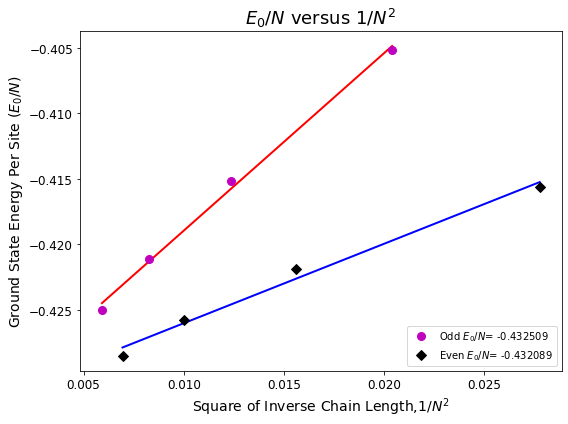

In [10]:
if __name__ == "__main__":
    main()